<a href="https://colab.research.google.com/github/Welison-Mattedi/MVP-teste/blob/main/MVP_An%C3%A1lise_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Análise de Dados e Boas Práticas

**Nome:** Welison Mattedi

**Matrícula:** 4052025000152

**Dataset:** used_cars_UK (https://www.kaggle.com/datasets/muhammadawaistayyab/used-cars-prices-in-uk/data)

**---OBSERVAÇÕES IMPORTANTES---**

 Encorajamos você a usar a estrutura base deste Notebook para a construção das suas análises, já que ela contempla grande parte das sugestões do checklist no enunciado do MVP. Contudo, vale ressaltar que é necessário realizar mais etapas e análises, além das apresentadas neste notebook. É fundamental ter profundidade nas discussões e análises propostas, construindo um storytelling cativante que explore os principais conceitos e técnicas vistos nas aulas de Análise de Dados e Boas Práticas.

 **------**

# Descrição do Problema
O conjunto de dados deste dataset é uma coleção abrangente de informações automotivas extraídas de um site de venda de veículos automotivo, autotrader.co.uk.
Este conjunto de dados compreende 3.685 carros seminovos à venda, cada um representando um anúncio de veículo exclusivo, e inclui treze atributos distintos que fornecem insights valiosos sobre o mundo automobilístico.


## Hipóteses do Problema

As hipóteses que tracei são as seguintes:

- As diferentes espécies de Íris podem ser distinguidas com base nas medições de suas sépalas e pétalas?

- Existe uma correlação entre comprimento da pétala e largura da pétala?

- A espécie Iris setosa é mais facilmente separável das outras duas espécies?

## Tipo de Problema


Este é um problema de **classificação supervisionada**, pois o aprendizado supervisionado, o modelo aprende a partir de exemplos rotulados, ou seja, o conjunto de dados possui uma variável alvo conhecida, que o modelo tenta prever com base nas variáveis de entrada, no caso as caracteristicas dos carros como quilometragem rodada, ano de fabricação, consumo de combustivel, etc.




## Seleção de Dados

O dataset Carros_Usados é um conjunto de dados amplamente disponível e frequentemente incluído em bibliotecas de aprendizado de máquina, como *scikit-learn* no Python. Não é necessária uma etapa de seleção de dados externa, pois o dataset já está curado e pronto para uso.

## Atributos do Dataset

O dataset *used_cars_UK* contém 3.685 carros seminovos à venda, cada um representando um anúncio de veículo exclusivo, e inclui treze atributos distintos que são:


*   Title-----------------------------------Nome
*   Price----------------------------------Libras (£)
*   Mileage(miles)------------------Quilometragem (milhas)
*   Registration(year)--------------Ano de emplacamento
*   Previous Owners----------------Proprietários anteriores
*   Fuel Type---------------------------Tipo de combustível
*   Body Type--------------------------Tipo de carroceria
*   Engine--------------------------------Motor (capacidade de cilindrada (L)
*   Gearbox-----------------------------Tipo de câmbio (manual ou automático)
*   Seats---------------------------------Número de ocupantes
*   Doors---------------------------------Número de portas
*   Emission Class------------------Classes de emissão de CO2, como as normas Euro (Euro 1, 2, 3, 4, 5, 6)
*   Service history-------------------Hitórico de manutenções

Fuel type, Body type, Engine, Gearbox, Emission Class:são características técnicas do carros.


















#Hipótesis sobre o problema

Variáveis	São suficientes para explicar o preço
Qualidade dos dados	Estão corretos, consistentes e foram tratados
Representatividade	O conjunto reflete o mercado real
Tempo	O comportamento do mercado não mudou drasticamente
Rótulo	O limite de £5.000 é adequado para definir “preço alto”
Independência	Cada registro representa um carro único
Generalização	Novos dados seguem a mesma distribuição dos dados de treino



# Importação das Bibliotecas Necessárias e Carga de Dados

Esta seção consolida todas as importações de bibliotecas necessárias para a análise, visualização e pré-processamento dos dados.

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn.datasets import load_star_dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression

In [3]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Carros_Usados.csv to Carros_Usados.csv
User uploaded file "Carros_Usados.csv" with length 364255 bytes


In [4]:
dataset = pd.read_csv('Carros_Usados.csv')

In [114]:
# Exibir as primeiras linhas do DataFrame
print(dataset.head())

            Title  Price  Mileage(miles)  Registration_Year  Previous Owners  \
0     SKODA Fabia   6900           70189               2016              3.0   
1  Vauxhall Corsa   1495           88585               2008              4.0   
2     Hyundai i30    949          137000               2011              NaN   
3      MINI Hatch   2395           96731               2010              5.0   
4  Vauxhall Corsa   1000           85000               2013              NaN   

  Fuel type  Body type Engine Gearbox  Doors  Seats Emission Class  \
0    Diesel  Hatchback   1.4L  Manual    5.0    5.0         Euro 6   
1    Petrol  Hatchback   1.2L  Manual    3.0    5.0         Euro 4   
2    Petrol  Hatchback   1.4L  Manual    5.0    5.0         Euro 5   
3    Petrol  Hatchback   1.4L  Manual    3.0    4.0         Euro 4   
4    Diesel  Hatchback   1.3L  Manual    5.0    5.0         Euro 5   

  Service history  Preco_Alto  
0             NaN           1  
1            Full           0  
2 

In [6]:
# verificando que 'Carros_Usados' é um dataframe
type(dataset)

pandas.core.frame.DataFrame

In [ ]:
# verificando os tipos de cada coluna do dataframe
dataset.dtypes

,0
Title,object
Price,int64
Mileage(miles),int64
Registration_Year,int64
Previous Owners,float64
Fuel type,object
Body type,object
Engine,object
Gearbox,object
Doors,float64


In [ ]:
# exibindo as dimensões do dataset
dataset.shape

(3685, 13)

In [ ]:
#exibir o nome das colunas
dataset.columns

Index(['Title', 'Price', 'Mileage(miles)', 'Registration_Year',
       'Previous Owners', 'Fuel type', 'Body type', 'Engine', 'Gearbox',
       'Doors', 'Seats', 'Emission Class', 'Service history'],
      dtype='object')

In [ ]:
# exibir as primeiras linhas
dataset.head()


,Title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,SKODA Fabia,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,Vauxhall Corsa,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,Hyundai i30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN
3,MINI Hatch,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,Vauxhall Corsa,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN


In [ ]:
# exibir um sumario estatístico
dataset.describe()


,Price,Mileage(miles),Registration_Year,Previous Owners,Doors,Seats
count,3685.000000,3.685000e+03,3685.000000,2276.000000,3660.000000,3650.000000
mean,5787.145726,8.132816e+04,2011.835007,2.807557,4.321038,4.900274
std,4480.810572,3.942083e+04,5.092566,1.546028,0.986902,0.577200
min,400.000000,1.000000e+00,1953.000000,1.000000,2.000000,2.000000
25%,2490.000000,5.698400e+04,2008.000000,2.000000,3.000000,5.000000
50%,4000.000000,8.000000e+04,2012.000000,3.000000,5.000000,5.000000
75%,7995.000000,1.030000e+05,2015.000000,4.000000,5.000000,5.000000
max,33900.000000,1.110100e+06,2023.000000,9.000000,5.000000,7.000000


# Análise de Dados

Nesta etapa de Análise de Dados Exploratória (EDA) sobre o dataset Iris, visamos entender a distribuição, as relações e as características das variáveis, o que é crucial para as etapas subsequentes de pré-processamento e modelagem.

O dataset Colunas com valores ausentes:

Previous Owners: ~38% ausentes

Engine: 45 ausentes

Doors: 25 ausentes

Seats: 35 ausentes

Emission Class: 87 ausentes

Service history: ~85% ausentes

## Total e Tipo das Instâncias

O dataset possui 3685 linhas e 13 colunas apresentando dados e características de veículos seminovos.

In [ ]:
print(f"Total de instâncias: {len(dataset)}")
print("\nTipos de dados por coluna:")
print(dataset.info())

Total de instâncias: 3685

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3685 entries, 0 to 3684
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              3685 non-null   object 
 1   Price              3685 non-null   int64  
 2   Mileage(miles)     3685 non-null   int64  
 3   Registration_Year  3685 non-null   int64  
 4   Previous Owners    2276 non-null   float64
 5   Fuel type          3685 non-null   object 
 6   Body type          3685 non-null   object 
 7   Engine             3640 non-null   object 
 8   Gearbox            3685 non-null   object 
 9   Doors              3660 non-null   float64
 10  Seats              3650 non-null   float64
 11  Emission Class     3598 non-null   object 
 12  Service history    540 non-null    object 
dtypes: float64(3), int64(3), object(7)
memory usage: 374.4+ KB
None


In [ ]:
# exibindo a quantidade de linhas por coluna
dataset.count()

,0
Title,3685
Price,3685
Mileage(miles),3685
Registration_Year,3685
Previous Owners,2276
Fuel type,3685
Body type,3685
Engine,3640
Gearbox,3685
Doors,3660


In [ ]:
# exibindo um sumário estatístico
dataset.describe()

,Price,Mileage(miles),Registration_Year,Previous Owners,Doors,Seats
count,3685.000000,3.685000e+03,3685.000000,2276.000000,3660.000000,3650.000000
mean,5787.145726,8.132816e+04,2011.835007,2.807557,4.321038,4.900274
std,4480.810572,3.942083e+04,5.092566,1.546028,0.986902,0.577200
min,400.000000,1.000000e+00,1953.000000,1.000000,2.000000,2.000000
25%,2490.000000,5.698400e+04,2008.000000,2.000000,3.000000,5.000000
50%,4000.000000,8.000000e+04,2012.000000,3.000000,5.000000,5.000000
75%,7995.000000,1.030000e+05,2015.000000,4.000000,5.000000,5.000000
max,33900.000000,1.110100e+06,2023.000000,9.000000,5.000000,7.000000


In [ ]:
# ordenando o dataframe por uma coluna
#coluna Radius em ordem crescente
dataset.sort_values(by='Price')

,Title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
3243,SEAT Ibiza,400,120842,2010,4.0,Diesel,Hatchback,1.2L,Manual,3.0,5.0,Euro 5,NaN
3276,Vauxhall Astra,450,115000,2005,NaN,Diesel,Hatchback,1.7L,Manual,5.0,5.0,Euro 4,NaN
1236,Vauxhall Astra,495,97000,2011,7.0,Diesel,Hatchback,1.7L,Manual,5.0,5.0,Euro 5,NaN
3244,Ford Fiesta,499,111875,2007,4.0,Petrol,Hatchback,1.4L,Manual,3.0,5.0,Euro 4,NaN
3240,Renault Clio,500,138061,2007,5.0,Petrol,Hatchback,1.4L,Manual,3.0,5.0,Euro 4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3100,SEAT Ateca,25995,222,2023,NaN,Petrol,SUV,1.5L,Manual,5.0,5.0,Euro 6,NaN
3228,Land Rover Range Rover Sport,25995,36363,2015,NaN,Diesel,SUV,3.0L,Automatic,5.0,5.0,Euro 5,NaN
3222,BMW X3 Series,28240,45155,2019,1.0,Diesel,SUV,2.0L,Automatic,5.0,5.0,Euro 6,NaN
2934,Land Rover Range Rover Sport,30000,46000,2017,2.0,Diesel,SUV,2.0L,Automatic,5.0,5.0,Euro 6,NaN


In [ ]:
# selecionando uma coluna específica
dataset['Title']

,Title
0,SKODA Fabia
1,Vauxhall Corsa
2,Hyundai i30
3,MINI Hatch
4,Vauxhall Corsa
...,...
3680,Renault Megane
3681,Audi A4
3682,BMW 3 Series
3683,Honda Accord


In [ ]:
# selecionando um subconjunto de colunas para todas as linhas
dataset.loc[:, ['Title', 'Price', ]]


,Title,Price
0,SKODA Fabia,6900
1,Vauxhall Corsa,1495
2,Hyundai i30,949
3,MINI Hatch,2395
4,Vauxhall Corsa,1000
...,...,...
3680,Renault Megane,1395
3681,Audi A4,6990
3682,BMW 3 Series,3995
3683,Honda Accord,1390


## selecionando um subconjunto de colunas para todas as linhas
Aqui selecionamos a coluna *Previous Owners*

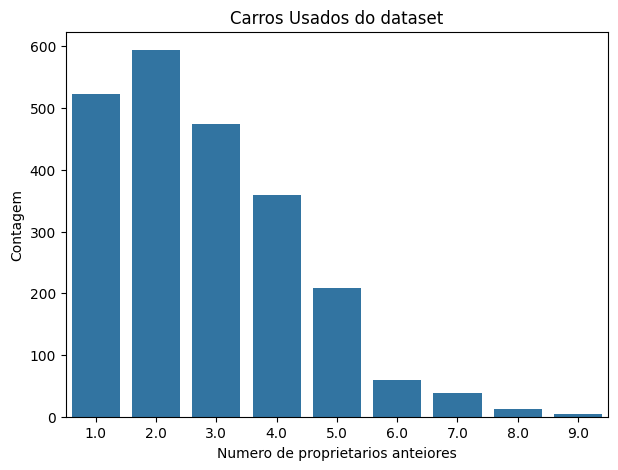

In [115]:
plt.figure(figsize=(7, 5))
# gráfico de barras simples
sns.countplot(x='Previous Owners', data=dataset)
plt.title('Carros Usados do dataset')
plt.xlabel('Numero de proprietarios anteiores')
plt.ylabel('Contagem')
plt.show()

Pelo gráfico de barras, podemos observar que a maioria dos carros já teve mais de 2 proprietários.

## Estatísticas Descritivas

Estatísticas descritivas fornecem um resumo das características numéricas, incluindo média, desvio padrão, mínimo, máximo e quartis.

In [ ]:
# estatísticas descritivas básicas do dataset
dataset.describe()

,Price,Mileage(miles),Registration_Year,Previous Owners,Doors,Seats
count,3685.000000,3.685000e+03,3685.000000,2276.000000,3660.000000,3650.000000
mean,5787.145726,8.132816e+04,2011.835007,2.807557,4.321038,4.900274
std,4480.810572,3.942083e+04,5.092566,1.546028,0.986902,0.577200
min,400.000000,1.000000e+00,1953.000000,1.000000,2.000000,2.000000
25%,2490.000000,5.698400e+04,2008.000000,2.000000,3.000000,5.000000
50%,4000.000000,8.000000e+04,2012.000000,3.000000,5.000000,5.000000
75%,7995.000000,1.030000e+05,2015.000000,4.000000,5.000000,5.000000
max,33900.000000,1.110100e+06,2023.000000,9.000000,5.000000,7.000000


### Média

A média é uma medida de tendência central que representa o valor típico ou o ponto de equilíbrio de um conjunto de dados. É calculada somando-se todos os valores e dividindo-se pelo número total de observações. É sensível a valores extremos (outliers).

In [ ]:
# média dos atributos numéricos do dataset
dataset.describe().loc['mean']

,mean
Price,5787.145726
Mileage(miles),81328.164722
Registration_Year,2011.835007
Previous Owners,2.807557
Doors,4.321038
Seats,4.900274


In [ ]:
# Qual gráfico seria interessante usar pra mostrar a média?

### Desvio Padrão

O desvio padrão é uma medida de dispersão que quantifica a quantidade de variação ou dispersão de um conjunto de valores. Um desvio padrão baixo indica que os pontos de dados tendem a estar próximos da média do conjunto, enquanto um desvio padrão alto indica que os pontos de dados estão espalhados por uma faixa maior de valores. Ele é a raiz quadrada da variância.

In [ ]:
# desvio padrão dos atributos numéricos do dataset
dataset.describe().loc['std']

,std
Price,4480.810572
Mileage(miles),39420.833595
Registration_Year,5.092566
Previous Owners,1.546028
Doors,0.986902
Seats,0.577200


In [ ]:
# Qual gráfico seria interessante usar pra mostrar o desvio padrão?

## Histograma

A distribuição de dados descreve como os valores de uma variável se espalham, ou seja, a frequência com que diferentes valores ocorrem. Entender a distribuição é crucial na análise de dados, pois revela padrões, tendências centrais, dispersão e a presença de valores atípicos (outliers). O histograma é uma ferramenta visual fundamental para representar essa distribuição, mostrando a forma dos dados, se são simétricos ou assimétricos, unimodais ou multimodais.

### *sepal length*

Alguma curiosidade ou fato importante sobre o atributo que estamos olhando a distribuição?

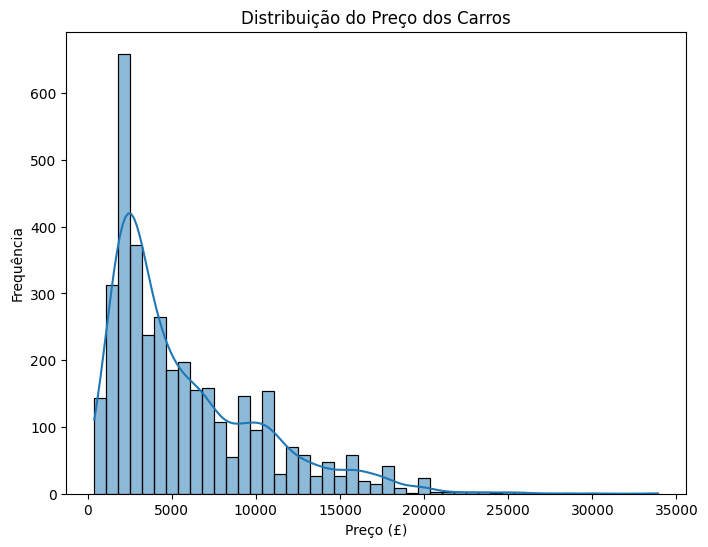

In [ ]:
plt.figure(figsize=(8, 6))
# Histograma do comprimento da sépala (um dos atributos)
sns.histplot(dataset['Price'], kde=True)
plt.title('Distribuição do Preço dos Carros')
plt.xlabel('Preço (£)')
plt.ylabel('Frequência')
plt.show()

O histograma mostra a distribuição do comprimento da sépala. A curva de densidade estimada (KDE) nos indica que a distribuição parece bimodal ou multimodal, indicando que as espécies podem ter comprimentos de sépalas diferentes.

### *sepal width*

Alguma curiosidade ou fato importante sobre o atributo que estamos olhando a distribuição?

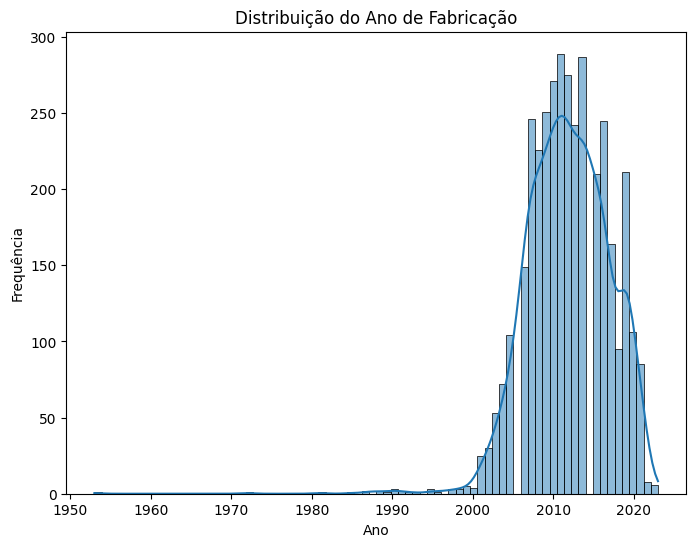

In [ ]:
plt.figure(figsize=(8, 6))
# Histograma do comprimento da sépala (um dos atributos)
sns.histplot(dataset['Registration_Year'], kde=True)
plt.title('Distribuição do Ano de Fabricação')
plt.xlabel('Ano')
plt.ylabel('Frequência')
plt.show()

Quais impressões você tem sobre a distribuição do atributo 'sepal width'?

## Boxplot

Para entender as diferenças entre as espécies, devemos olhar como se comportam os valores quando agrupadas por espécie. Isso nos permite comparar a média, mediana e desvio padrão de cada característica para Iris setosa, Iris versicolor e Iris virginica, além de visualizar suas distribuições por meio de boxplots.


In [ ]:
# Estatísticas descritivas agrupadas por espécie
dataset.groupby('Mileage(miles)').describe()

Price                                                           \
               count     mean         std      min      25%      50%      75%   
Mileage(miles)                                                                  
1                2.0  18440.0  106.066017  18365.0  18402.5  18440.0  18477.5   
6                1.0  15500.0         NaN  15500.0  15500.0  15500.0  15500.0   
222              1.0  25995.0         NaN  25995.0  25995.0  25995.0  25995.0   
1048             1.0  21495.0         NaN  21495.0  21495.0  21495.0  21495.0   
4000             1.0  18499.0         NaN  18499.0  18499.0  18499.0  18499.0   
...              ...      ...         ...      ...      ...      ...      ...   
208000           1.0   1995.0         NaN   1995.0   1995.0   1995.0   1995.0   
225318           1.0    750.0         NaN    750.0    750.0    750.0    750.0   
234680           1.0   2600.0         NaN   2600.0   2600.0   2600.0   2600.0   
274100           7.0    795.0    0.000000    795.0    795.0    795.0    795.0   
1110100          1.0   2495.0         NaN   2495.0   2495.0   2495.0   2495.0   

                        Registration_Year          ... Doors      Seats       \
                    max             count    mean  ...   75%  max count mean   
Mileage(miles)                                     ...                         
1               18515.0               2.0  2023.0  ...   5.0  5.0   2.0  5.0   
6               15500.0               1.0  2004.0  ...   4.0  4.0   1.0  5.0   
222             25995.0               1.0  2023.0  ...   5.0  5.0   1.0  5.0   
1048            21495.0               1.0  2023.0  ...   5.0  5.0   1.0  5.0   
4000            18499.0               1.0  2021.0  ...   5.0  5.0   1.0  5.0   
...                 ...               ...     ...  ...   ...  ...   ...  ...   
208000           1995.0               1.0  2009.0  ...   2.0  2.0   1.0  4.0   
225318            750.0               1.0  1989.0  ...   5.0  5.0   0.0  NaN   
234680           2600.0               1.0  2011.0  ...   5.0  5.0   1.0  5.0   
274100            795.0               7.0  2004.0  ...   5.0  5.0   7.0  5.0   
1110100          2495.0               1.0  2003.0  ...   3.0  3.0   1.0  4.0   

                                              
                std  min  25%  50%  75%  max  
Mileage(miles)                                
1               0.0  5.0  5.0  5.0  5.0  5.0  
6               NaN  5.0  5.0  5.0  5.0  5.0  
222             NaN  5.0  5.0  5.0  5.0  5.0  
1048            NaN  5.0  5.0  5.0  5.0  5.0  
4000            NaN  5.0  5.0  5.0  5.0  5.0  
...             ...  ...  ...  ...  ...  ...  
208000          NaN  4.0  4.0  4.0  4.0  4.0  
225318          NaN  NaN  NaN  NaN  NaN  NaN  
234680          NaN  5.0  5.0  5.0  5.0  5.0  
274100          0.0  5.0  5.0  5.0  5.0  5.0  
1110100         NaN  4.0  4.0  4.0  4.0  4.0  

[1570 rows x 40 columns]

### *petal length* por Espécie


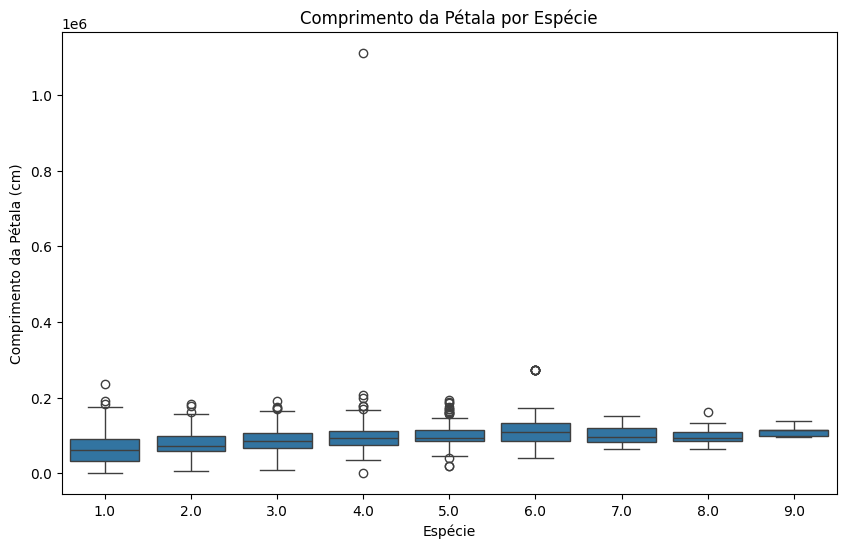

In [ ]:
# Boxplot do comprimento da pétala por espécie
plt.figure(figsize=(10, 6))
sns.boxplot(x='Previous Owners', y='Mileage(miles)', data=dataset)
plt.title('Comprimento da Pétala por Espécie')
plt.xlabel('Espécie')
plt.ylabel('Comprimento da Pétala (cm)')
plt.show()

O boxplot do comprimento da pétala por espécie demonstra claramente que a Iris setosa tem pétalas significativamente mais curtas do que as outras duas espécies. Há uma sobreposição entre Iris versicolor e Iris virginica, mas as medianas e as caixas indicam uma distinção.

### *petal width* por Espécie

In [ ]:
# Boxplot do comprimento da pétala por espécie
plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='petal width (cm)', data=df)
plt.title('Largura da Pétala por Espécie')
plt.xlabel('Espécie')
plt.ylabel('Largura da Pétala (cm)')
plt.show()

Quais impressões o boxplot trouxe?

## Matriz de Correlação

A matriz de correlação mede a força e a direção de uma relação linear que os atributos numéricos das espécies podem ter. Valores próximos a 1 indicam uma forte correlação positiva, -1 uma forte correlação negativa, e 0 ausência de correlação linear.

O método corr() funciona apenas com dados numéricos. No seu conjunto de dados DataFrame, a primeira coluna ('Title') contém nomes de carros, que são strings.

numeric_cols = ['Preço', 'Quilometragem(milhas)', 'Ano_de_Registro', 'Proprietários Anteriores', 'Portas', 'Assentos']: Esta linha cria uma lista chamada numeric_cols contendo os nomes das colunas no seu DataFrame que possuem dados numéricos.
dataset[numerical_cols]: Seleciona apenas as colunas listadas em numeric_cols do conjunto de dados DataFrame.
.corr(): Este método é aplicado às colunas numéricas selecionadas e calcula a correlação entre pares entre cada par de colunas. O resultado é uma matriz de correlação.
print("\nMatriz de Correlação:"): Esta linha imprime um cabeçalho antes de exibir a matriz de correlação.
print(...): Esta linha imprime a matriz de correlação calculada no console.
A matriz de correlação mostra a intensidade da relação linear entre cada par de variáveis ​​numéricas. Os valores variam de -1 a 1, onde:

1 indica uma correlação linear positiva perfeita.
-1 indica uma correlação linear negativa perfeita.
0 indica que não há correlação linear.

In [11]:
# Matriz de correlação
print("\nMatriz de Correlação:")
numerical_cols = ['Price', 'Mileage(miles)', 'Registration_Year', 'Previous Owners', 'Doors', 'Seats']
print(dataset[numerical_cols].corr())


Matriz de Correlação:
                      Price  Mileage(miles)  Registration_Year  \
Price              1.000000       -0.500158           0.723880   
Mileage(miles)    -0.500158        1.000000          -0.417029   
Registration_Year  0.723880       -0.417029           1.000000   
Previous Owners   -0.479424        0.316160          -0.501045   
Doors              0.113352       -0.037042           0.217475   
Seats             -0.027406        0.095287           0.037120   

                   Previous Owners     Doors     Seats  
Price                    -0.479424  0.113352 -0.027406  
Mileage(miles)            0.316160 -0.037042  0.095287  
Registration_Year        -0.501045  0.217475  0.037120  
Previous Owners           1.000000 -0.153262 -0.029338  
Doors                    -0.153262  1.000000  0.497163  
Seats                    -0.029338  0.497163  1.000000  


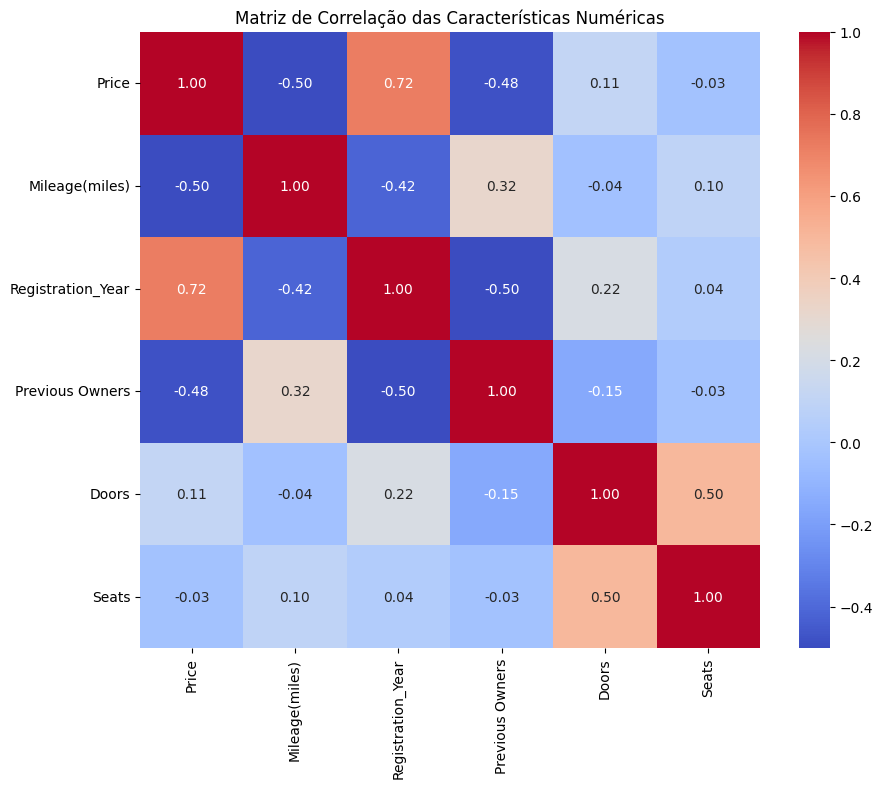

In [7]:
plt.figure(figsize=(10, 8))
# mapa de calor das variáveis numéricas
numerical_cols = ['Price', 'Mileage(miles)', 'Registration_Year', 'Previous Owners', 'Doors', 'Seats']
sns.heatmap(dataset[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação das Características Numéricas')
plt.show()

O mapa de calor da matriz de correlação revela fortes correlações positivas entre *petal length* e *petal width*, bem como entre *sepal length* e *petal length*/*petal width*. Isso sugere que essas características se movem juntas, o que é útil para a seleção de características.

# Pré-Processamento de Dados

O pré-processamento de dados é uma etapa crucial para preparar os dados para modelagem, garantindo que estejam no formato correto e otimizados para o desempenho do algoritmo, melhorando a qualidade e o desempenho. Na etapa de pré-processamento pode ser feito a limpeza de dados, remoção ou correção de dados faltantes (valores nulos ou NaN), tratamento de  valores fora do padrão esperado (outliers), correção de inconsistências (dados duplicados ou conflitantes), transformação de dados, normalização ou padronização de variáveis numéricas (min-max scaling, z-score), conversão de variáveis categóricas em números (one-hot encoding), criação de novas variáveis, entre outros.


Para um conjunto de treino e teste utilizaremos a coluna Doors

In [13]:
# Separar features (X) e target (y)
X = dataset.drop('Doors', axis=1)
y = dataset['Doors']

In [14]:
# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

ValueError: Input y contains NaN.

Ao dividir os dados da coluna Doors em treino e teste, a execução retornou erro, pois os dados da coluna Doors possui valores ausentes NaN.
Assim será necessário remover os valores faltantes e em seguida dividir os dados em treino e teste.

In [21]:
# Check for missing values in the 'Doors' column
print("Missing values in 'Doors' column before handling:")
print(dataset['Doors'].isnull().sum())


Missing values in 'Doors' column before handling:
25


In [22]:
# Drop rows with missing values in the 'Doors' column
dataset_cleaned = dataset.dropna(subset=['Doors'])

In [23]:
# Separate features (X) and target (y) from the cleaned dataset
X_cleaned = dataset_cleaned.drop('Doors', axis=1)
y_cleaned = dataset_cleaned['Doors']

In [24]:
# Check for missing values in 'Doors' column after handling
print("\nMissing values in 'Doors' column after handling:")
print(y_cleaned.isnull().sum())


Missing values in 'Doors' column after handling:
0


In [25]:
# Split the cleaned data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, test_size=0.3, random_state=42, stratify=y_cleaned)

In [26]:
print(f"Dimensões de X_train: {X_train.shape}")
print(f"Dimensões de X_test: {X_test.shape}")
print(f"Dimensões de y_train: {y_train.shape}")
print(f"Dimensões de y_test: {y_test.shape}")

Dimensões de X_train: (2562, 12)
Dimensões de X_test: (1098, 12)
Dimensões de y_train: (2562,)
Dimensões de y_test: (1098,)


## Normalização

A normalização escala os dados para um intervalo fixo, geralmente entre 0 e 1. É útil quando o algoritmo de machine learning assume que as características estão em uma escala semelhante.
A principal razão para aplicar normalização é garantir que as variáveis numéricas estejam em uma escala semelhante.
Para normalização dos dados, utilizamos a função MinMaxScaler.

Ao aplicar a normalização no conjunto de teste, encontramos um erro, pois a função está sendo aplicado aos dados X_train, que ainda contêm colunas não numéricas, como 'Title', mas a função só pode processar dados numéricos.

In [35]:
# Inicializar o MinMaxScaler
scaler_norm = MinMaxScaler()

In [39]:
# Aprende min e max APENAS de X_train
scaler_norm.fit(X_train)
X_train_normalized = scaler_norm.transform(X_train)
# Usa a média e o desvio padrão aprendidos de X_train
X_test_normalized = scaler_norm.transform(X_test)

ValueError: could not convert string to float: 'Fiat 500'

Para isso,precisamos aplicar o *MinMaxScale*r apenas às colunas numéricas do conjunto de dados.
Assim utilizaremos a função *ColumnTransformer* do *scikit-learn*, que permite aplicar diferentes transformações a diferentes colunas.

In [41]:
# Identify numerical and categorical columns
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# Create a column transformer to apply MinMaxScaler to numerical features
# and pass through categorical features (or apply other transformations like OneHotEncoder)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_features),
        ('cat', 'passthrough', categorical_features) # Keep categorical columns as they are for now
    ])


In [46]:
# Apply the column transformer to the training and testing data
X_train_normalized = preprocessor.fit_transform(X_train)
X_test_normalized = preprocessor.transform(X_test)

print("Data processed successfully!")
print(f"Dimensões de X_train_processed: {X_train_normalized.shape}")
print(f"Dimensões de X_test_processed: {X_test_normalized.shape}")

Data processed successfully!
Dimensões de X_train_processed: (2562, 12)
Dimensões de X_test_processed: (1098, 12)


In [53]:
# Exibir as colunas após a normalização
print(df_normalized.columns)

Index(['Title', 'Price', 'Mileage(miles)', 'Registration_Year',
       'Previous Owners', 'Fuel type', 'Body type', 'Engine', 'Gearbox',
       'Seats', 'Emission Class', 'Service history'],
      dtype='object')


In [47]:
# Exibir as primeiras linhas dos dados normalizados (como DataFrame para melhor visualização)
df_normalized = pd.DataFrame(X_train_normalized, columns=X_train.columns)

In [48]:
print("\nPrimeiras 5 linhas dos dados normalizados (treino):")
print(df_normalized.head())


Primeiras 5 linhas dos dados normalizados (treino):
      Title     Price Mileage(miles) Registration_Year Previous Owners  \
0  0.195516  0.116742       0.885714               NaN             0.4   
1  0.195516  0.291862       0.828571               NaN             0.6   
2  0.068759  0.113094       0.571429               0.0             0.6   
3  0.086697  0.453059       0.814286               NaN             0.6   
4  0.074738   0.24188       0.814286              0.25             0.6   

         Fuel type Body type     Engine Gearbox      Seats Emission Class  \
0         Fiat 500    Petrol  Hatchback    0.9L     Manual         Euro 6   
1     SKODA Superb    Petrol  Hatchback    1.8L  Automatic         Euro 5   
2  Volkswagen Polo    Petrol      Coupe    1.0L     Manual         Euro 1   
3     BMW 3 Series    Diesel     Saloon    2.0L  Automatic         Euro 5   
4      Hyundai i20    Petrol  Hatchback    1.4L     Manual         Euro 4   

  Service history  
0             NaN  

O histograma de *Price* após a normalização mostra que os valores foram escalados para o intervalo de 0 a 1, mantendo a forma da distribuição original.

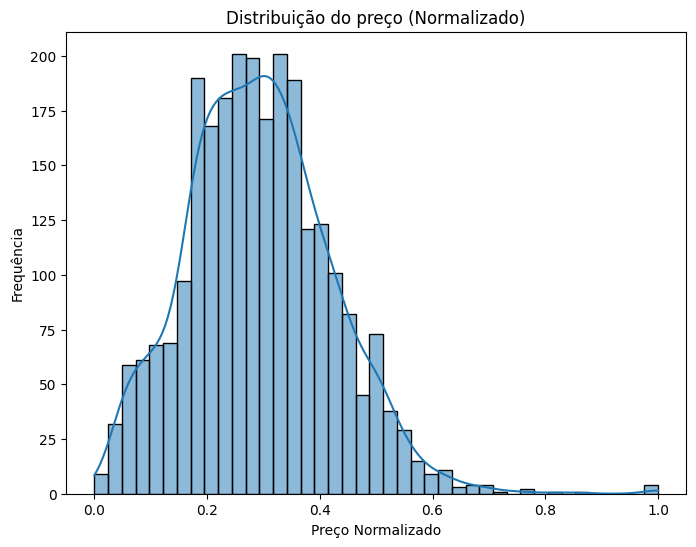

In [76]:
# Visualização da distribuição após a normalização (exemplo para uma característica)
plt.figure(figsize=(8, 6))
sns.histplot(df_normalized['Price'], kde=True)
plt.title('Distribuição do preço (Normalizado)')
plt.xlabel('Preço Normalizado')
plt.ylabel('Frequência')
plt.show()

## Padronização

A padronização (ou Z-score scaling) transforma os dados para ter média 0 e desvio padrão 1. É útil para algoritmos que são sensíveis à escala das características, como SVMs ou redes neurais.

In [77]:
# Inicializar o StandardScaler
scaler_std = StandardScaler()

In [80]:
# Apply the column transformer to the training and testing data using StandardScaler
preprocessor_std = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', 'passthrough', categorical_features) # Keep categorical columns as they are for now
    ])

X_train_standardized = preprocessor_std.fit_transform(X_train)
X_test_standardized = preprocessor_std.transform(X_test)

print("Data standardized successfully!")
print(f"Dimensões de X_train_standardized: {X_train_standardized.shape}")
print(f"Dimensões de X_test_standardized: {X_test_standardized.shape}")

Data standardized successfully!
Dimensões de X_train_standardized: (2562, 12)
Dimensões de X_test_standardized: (1098, 12)


In [81]:
# Exibir as primeiras linhas dos dados padronizados (como DataFrame para melhor visualização)
df_standardized = pd.DataFrame(X_train_standardized, columns=X_train.columns)

In [82]:
print("\nPrimeiras 5 linhas dos dados padronizados (treino):")
print(df_standardized.head())


Primeiras 5 linhas dos dados padronizados (treino):
      Title     Price Mileage(miles) Registration_Year Previous Owners  \
0   0.25404 -1.367088       0.610367               NaN       -1.592401   
1   0.25404 -0.010794      -0.162146               NaN        0.181113   
2 -0.684173 -1.395345      -3.638454         -1.158811        0.181113   
3 -0.551407  1.237675      -0.355275               NaN        0.181113   
4 -0.639918 -0.397903      -0.355275          0.130887        0.181113   

         Fuel type Body type     Engine Gearbox      Seats Emission Class  \
0         Fiat 500    Petrol  Hatchback    0.9L     Manual         Euro 6   
1     SKODA Superb    Petrol  Hatchback    1.8L  Automatic         Euro 5   
2  Volkswagen Polo    Petrol      Coupe    1.0L     Manual         Euro 1   
3     BMW 3 Series    Diesel     Saloon    2.0L  Automatic         Euro 5   
4      Hyundai i20    Petrol  Hatchback    1.4L     Manual         Euro 4   

  Service history  
0             NaN  

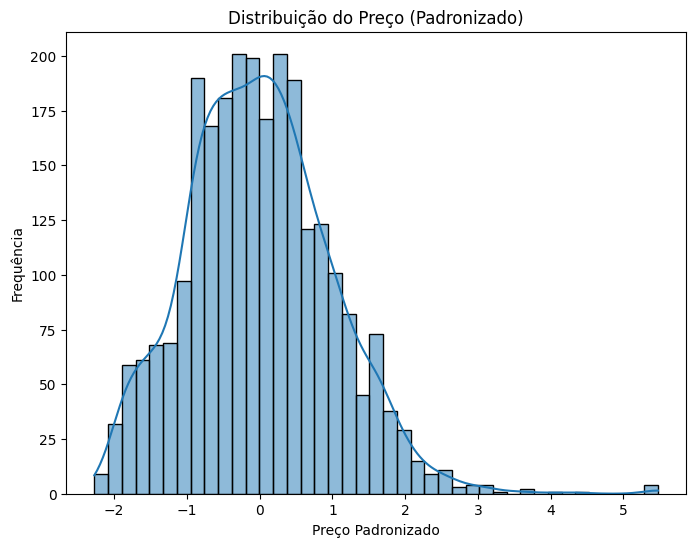

In [91]:
# Visualização da distribuição após a padronização (exemplo para uma característica)
plt.figure(figsize=(8, 6))
sns.histplot(df_standardized['Price'], kde=True)
plt.title('Distribuição do Preço (Padronizado)')
plt.xlabel('Preço Padronizado')
plt.ylabel('Frequência')
plt.show()

O histograma de *Price* após a padronização mostra que os valores foram transformados para ter uma média próxima de zero e um desvio padrão de um, centralizando a distribuição.

## Tratamento de Valores Nulos

O dataset Iris original não possui valores nulos. No entanto, o tratamento de valores nulos é crucial e pode envolver imputação (preenchimento com média, mediana, moda) ou remoção de linhas/colunas.

In [94]:
# Verificar a presença de valores nulos no dataset original
print("Valores nulos no dataset Carros_Usados:")
dataset.isnull().sum()

Valores nulos no dataset Carros_Usados:


,0
Title,0
Price,0
Mileage(miles),0
Registration_Year,0
Previous Owners,1409
Fuel type,0
Body type,0
Engine,45
Gearbox,0
Doors,25


## Outras Transformações e Etapas de Pré-Processamento

Outras etapas de pré-processamento incluem a seleção de características, redução de dimensionalidade (como PCA) ou criação de novas características (feature engineering). O que você faria a mais?



# Conclusão

A análise e pré-processamento do dataset Iris demonstram a importância de entender a estrutura dos dados antes da modelagem. O dataset é limpo e balanceado, com características numéricas bem definidas que permitem uma clara separação entre as espécies, especialmente a Iris setosa. A análise exploratória revelou correlações importantes entre as características e a eficácia de visualizações como boxplots para distinguir as classes. As etapas de normalização e padronização são fundamentais para preparar os dados para diversos algoritmos de aprendizado de máquina, garantindo que o modelo possa aprender eficientemente com as relações presentes nos dados.

As três hipóteses levantadas foram validadas:

1.   *As diferentes espécies de Íris podem ser distinguidas com base nas medições de suas sépalas e pétalas?* Sim, dado as análises que fizemos no boxplot, observamos um comportamento muito claro e distinto.

2.   *Existe uma correlação entre comprimento da pétala e largura da pétala?* Existe forte correlação entre os atributos *petal length* e *petal width*.

3.   *A espécie Iris setosa é mais facilmente separável das outras duas espécies?* Sim, devido às suas características distintas de menor comprimento e largura da pétala.

In [98]:
# Criar variável alvo: 1 se preço > 5000, senão 0
dataset['Preco_Alto'] = (dataset['Price'] > 5000).astype(int)

# Separar variáveis independentes e dependente
X = dataset.drop(columns=['Price', 'Preco_Alto'])
y = dataset['Preco_Alto']

In [100]:
# Identificar colunas numéricas e categóricas
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = X.select_dtypes(include='object').columns.tolist()

In [103]:
# Pipeline para colunas numéricas
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [107]:
# Pipeline para colunas categóricas
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [108]:
# Combinando os transformadores
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)


In [113]:
from sklearn.metrics import classification_report

# === 3. Modelo de Machine Learning ===
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinamento
model.fit(X_train, y_train)

# Avaliação
y_pred = model.predict(X_test)
print("📋 Relatório de Classificação:\n")
print(classification_report(y_test, y_pred))

📋 Relatório de Classificação:

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       661
           1       0.91      0.90      0.90       445

    accuracy                           0.92      1106
   macro avg       0.92      0.92      0.92      1106
weighted avg       0.92      0.92      0.92      1106



In [95]:
import streamlit as st
import pandas as pd
import numpy as np
import joblib
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Carrega os dados e prepara o pipeline
@st.cache_data
def load_data_and_model():
    df = pd.read_csv("Carros_Usados.csv")
    df['Preco_Alto'] = (df['Price'] > 5000).astype(int)

    X = df.drop(columns=['Price', 'Preco_Alto'])
    y = df['Preco_Alto']

    numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
    categorical_cols = X.select_dtypes(include='object').columns.tolist()

    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ])

    preprocessor = ColumnTransformer([
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

    model = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(max_iter=1000))
    ])

    model.fit(X, y)
    return model, X, numeric_cols, categorical_cols

model, X, numeric_cols, categorical_cols = load_data_and_model()

st.title("🔍 Previsão de Preço Alto para Carros Usados")
st.markdown("Preencha os campos abaixo para prever se o preço estimado será acima de £5.000")

# Interface dinâmica com base nas colunas
user_input = {}

for col in numeric_cols:
    min_val = float(X[col].min())
    max_val = float(X[col].max())
    default_val = float(X[col].mean())
    user_input[col] = st.slider(f"{col}", min_val, max_val, default_val)

for col in categorical_cols:
    options = list(X[col].dropna().unique())
    user_input[col] = st.selectbox(f"{col}", options)

# Transformar entrada em DataFrame
input_df = pd.DataFrame([user_input])

# Fazer a previsão
if st.button("Prever Preço"):
    prediction = model.predict(input_df)[0]
    prob = model.predict_proba(input_df)[0][prediction]
    resultado = "🟢 Acima de £5.000" if prediction == 1 else "🔴 £5.000 ou menos"
    st.markdown(f"## Resultado: {resultado}")
    st.markdown(f"Probabilidade: **{prob * 100:.2f}%**")

ModuleNotFoundError: No module named 'streamlit'